In [2]:
!pip install textacy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import spacy
import textacy
import networkx as nx

In [56]:
txt1 = """
    Annually hundreds of people have been untimely losing their lives in the Kathmandu Valley due to road accident.
    According to the Kathmandu Valley Traffic Police Office, as many as 88 people have lost their lives in 5,865 road accidents in the first six months of the current fiscal year.
    Likewise, 148 people were critically injured and 4,438 persons sustained minor injuries.
    Most of the deceased in the accidents are motorcyclists and pedestrians.
    Senior vice-president of the National Federation of Nepal Transport Entrepreneurs Punya Prasad (Saroj) Sitaula said that two-wheelers in the Kathmandu Valley are more prone to accidents.
    "High speed of motorcycles and scooters and pedestrians rampantly crossing the road have caused the highest number of fatalities in Kathmandu", he said.
    Spokesperson of Kathmandu Valley Traffic Police Office, Senior Superintendent of Police Rajendra Prasad Bhatta, said that the traffic police has been conducting various awareness programs to reduce the number of vehicle accidents in the Valley.
    "We have been tightening the checking of alcohol consumption to reduce accidents, rules prohibiting vehicles from plying at a speed of more than 50 kilometers per hour to control speeding, checking the status of vehicles and whether there are two drivers in long-distance vehicles," he said.
    """

txt2 = """
    Addressing a discussions programme on the promotion of electric cooking stove organized on the occasion of the fifth anniversary of the Electric Cooking Stove National Campaign in Lalitpur today, he said the electric stove is useful for every Nepali
    from the economic, social and environmental viewpoint. The theme of the discussions programme is – 'Let Us Increase the Use of Electric Stove: Let Us Contribute to Improving Health.' Energy Minister Basnet said that the government has emphasized on production of maximum hydroelectricity as it is the basis for the country's prosperity.
    He suggested enlisting the participation of the private sector also by providing it with subsidies and concession in the production of hydropower for the success of the campaign. The Minister called on all sides to be serious regarding the climate change impacts, including in the agricultural sector. Secretary at the Ministry of Energy, Water Resources and Irrigation, Gopal Prasad Sigdel said the government's attention is centred on
    promoting and increasing the use of electric cookstoves to substitute the import of LP Gas through the 16th periodic plan that commences from the next fiscal year.
    President of the National Federation of Community Electricity User, Narayan Gyawali on the occasion shared that together with various organisations, they have been effortful in making this campaign meaningful and successful. The campaign was launched on January 25, 2019.
    """

txt3 = """
The US Nepal Climbers Association and Nepal National Mountain Guide Association today announced that all preparations for the first Tenzing Norgay Sherpa Open Climbing Competition have almost completed.
Organising a press meet, NNMGA General Secretary Tshiring Jangbu Sherpa said that the organizers were giving a final touch to the preparatory works for the Tenzing Norgay Sherpa Open Climbing Competition (Top Rope Edition), which is scheduled to take place on January 29 at Crimpanzee Adventure Hub, Bouddha.
The event jointly organised by the USNCA and NNMGA aims to promote the sport of climbing, offering a platform for climbers of all levels to showcase their skills and passion for ascending to new heights.
"The competition aims to unite climbers from diverse backgrounds, encouraging a vibrant and supportive community bound by a shared love for the ascent," Tshiring Jangbu, who is also coordinator for the event, added.
USNCA's treasurer Lhakpa Nuru Sherpa said that the joint event marks a collaborative venture between NNMGA and USNCA.
"We plan to continue it as an annual event," he added. "We expect more than 40 participants in the event," founding president of USNCA Serap Jangbu Sherpa said.
The event promises not only intense competition but also a celebration of climbing culture, camaraderie, and the enduring spirit of Tenzing Norgay Sherpa, he shared. For the event, Imagine Nepal Treks, 4Stories, USNCA chair Passang Nima Sherpa, 8K Expeditions, Likla Outdoor, Wongchu Peak Promotion and The North Face Nepal agreed to become the title sponsors while BaRo 360, Dawa Jangbu Sherpa, Lakpa Geljen Sherpa, Phutila Sherpa and Mountain Hardware would be the gold sponsors, according to the organizers.
The event also aims to become a launchpad for climbers aspiring to reach Olympic heights. According to Lhakpa Nuru, participants in both the male and female categories have the opportunity to win impressive cash prizes in the competition.
"The first, second, and third positioned climbers will be awarded a cash prize of NRs 15,000, NRs 10,000, and NRs 5,000, respectively," the organizers added. The winners will also get hanging boards, certificates and striking medals while all participants will be given certificates.
Anyone above the age of 12 years can participate in the competition after paying Rs 500 as registration fee. "In the coming years the event aims to diversify its categories," Tshiring Jangbu informed. The organizers aim to introduce additional categories such as lead climbing, speed climbing and bouldering, expanding the competition's scope and providing more opportunities for climbers to showcase their skills across different disciplines.
"""

nlp = spacy.load("en_core_web_sm")
doc = nlp(txt3)

In [57]:
# from text to a list of sentences
lst_docs = [sent for sent in doc.sents]
print("tot sentences:", len(lst_docs))

tot sentences: 16


In [58]:
# POS and DEP tags predicted by the NLP model
i = 5
for token in lst_docs[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")

" --> pos: PUNCT | dep: punct 
We --> pos: PRON | dep: nsubj 
plan --> pos: VERB | dep: ccomp 
to --> pos: PART | dep: aux 
continue --> pos: VERB | dep: xcomp 
it --> pos: PRON | dep: dobj 
as --> pos: ADP | dep: prep 
an --> pos: DET | dep: det 
annual --> pos: ADJ | dep: amod 
event --> pos: NOUN | dep: pobj 
, --> pos: PUNCT | dep: punct 
" --> pos: PUNCT | dep: punct 
he --> pos: PRON | dep: nsubj 
added --> pos: VERB | dep: ROOT 
. --> pos: PUNCT | dep: punct 


In [59]:
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})")

### Entity and Relation extraction

Using textacy which is more accurate and user friendly

In [60]:
dic = {"id":[], "text":[], "subject":[], "relation":[], "object_":[]}

for n, sentence in enumerate(lst_docs):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["subject"].append(subj)
        dic["object_"].append(obj)
        dic["relation"].append(relation)


# Create Dataframe of dictionary
dtf = pd.DataFrame(dic)
dtf.head()

,id,text,subject,relation,object_
0,1,"Organising a press meet, NNMGA General Secreta...",organizers,were_giving,touch
1,1,"Organising a press meet, NNMGA General Secreta...",which,is_scheduled,to_take_place_on_January_29_at_Crimpanzee_Adve...
2,2,The event jointly organised by the USNCA and N...,event,aims,"to_promote_the_sport_of_climbing_,"
3,3,"""The competition aims to unite climbers from d...",competition,aims,"to_unite_climbers_from_diverse_backgrounds_,_e..."
4,4,USNCA's treasurer Lhakpa Nuru Sherpa said that...,event,marks,venture


### Network Graph

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


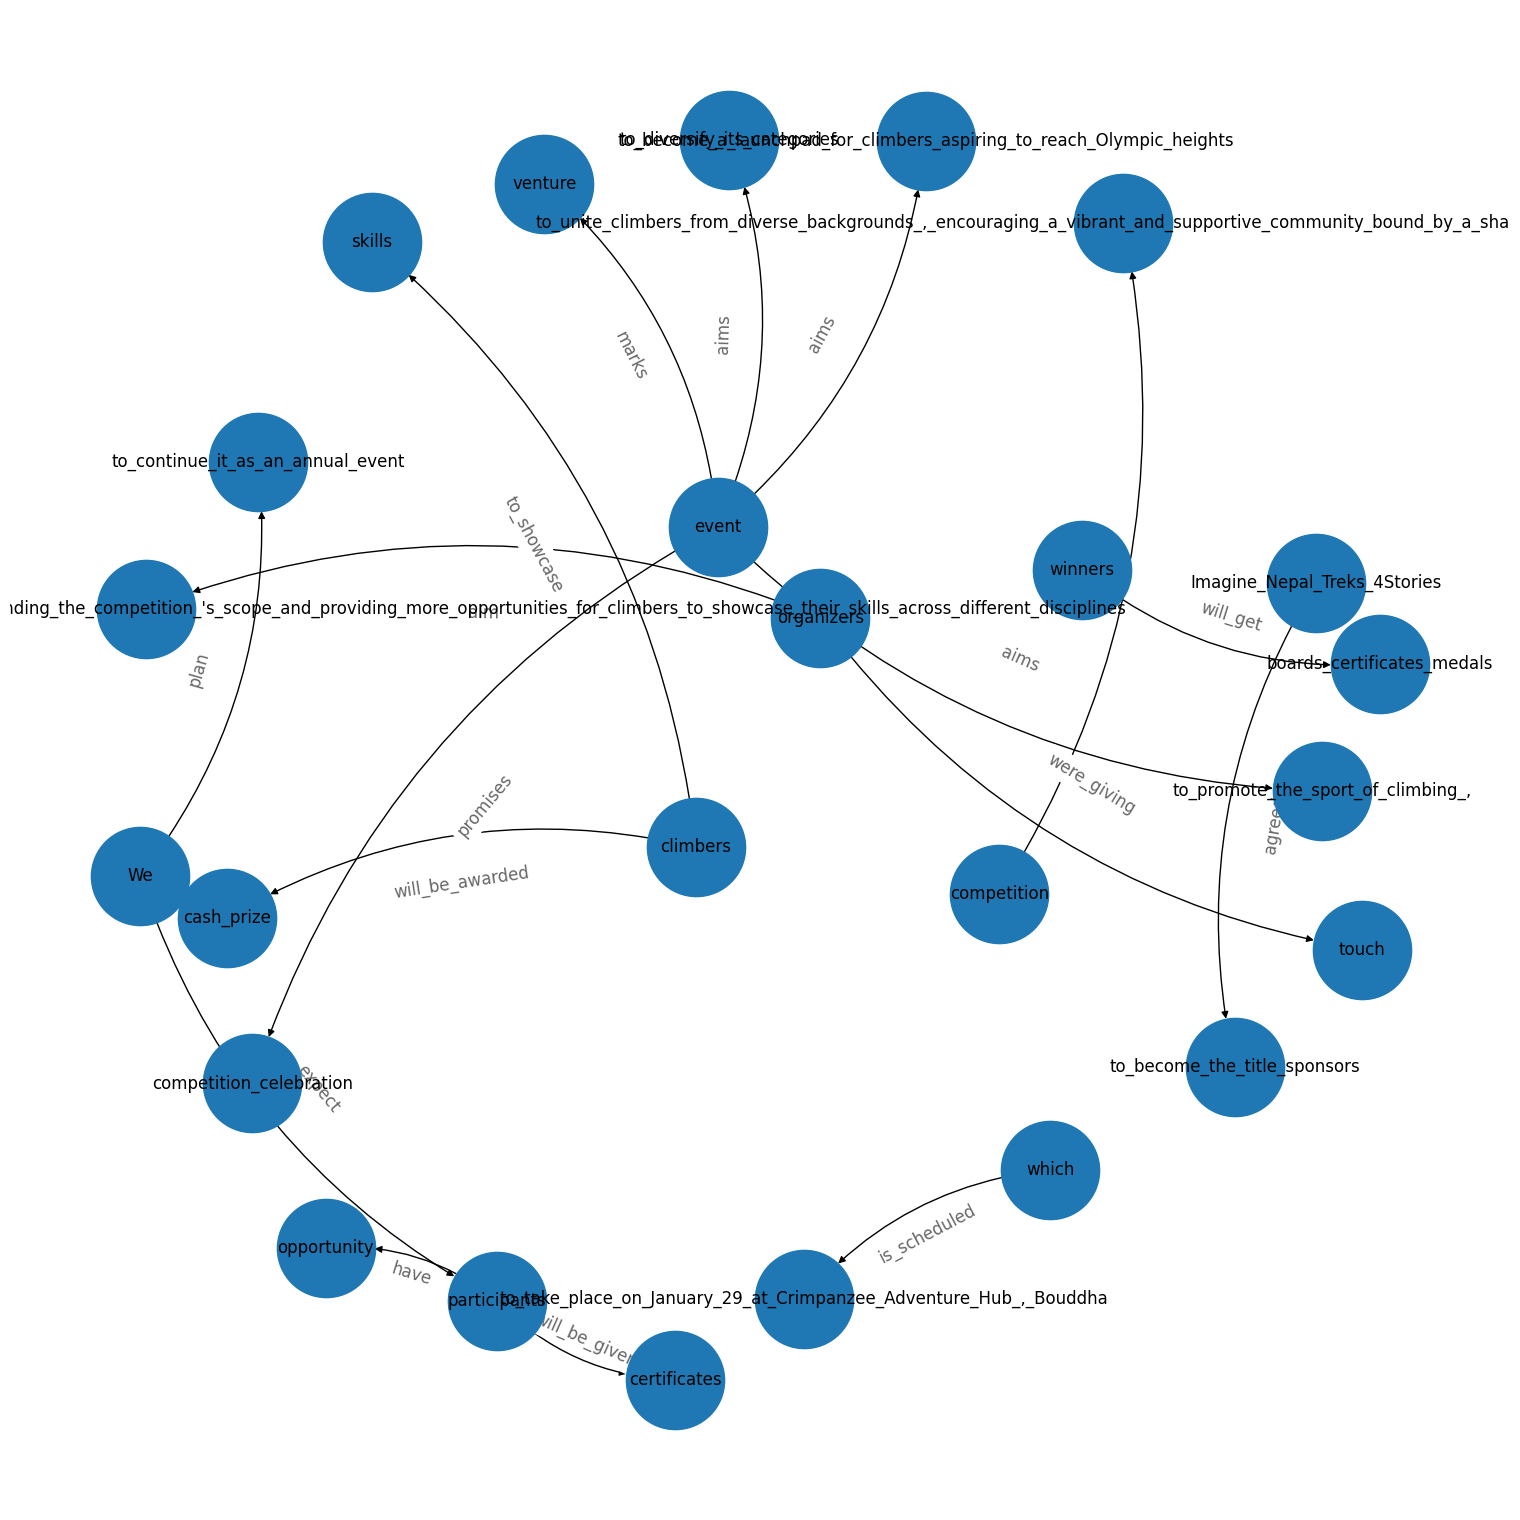

In [61]:
# Creating Digraph
G = nx.from_pandas_edgelist(dtf, source="subject", target="object_", edge_attr="relation",
                            create_using=nx.DiGraph())

# Plotting
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=1)

nx.draw(G, pos=pos, with_labels=True, cmap=plt.cm.Dark2, node_size=5000, connectionstyle='arc3,rad=0.2')
nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5,
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()
